<a href="https://colab.research.google.com/github/vineethavgnair/ac_as1/blob/master/mnist_convolutional_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
keras.__version__


Using TensorFlow backend.


'2.2.5'

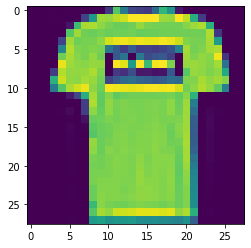

In [8]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt


#download mnist data and split into train and test sets


(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#plot the first image in the dataset
plt.imshow(X_train[1])

X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

![Design layout of our experiment](https://drive.google.com/uc?id=1_HKSTo1I2S7I3c_A8K7TMCZFP38DpJP0)

![Design](https://drive.google.com/uc?id=18n4Pqqjt6bWNjUJU9utqaX52W2cfpcXk)

In [9]:
#check image shape
print ("Dimensions of X_train: ", X_train.shape)

print ("Dimension of the second element in X_train: ", X_train[1].shape)

Dimensions of X_train:  (60000, 28, 28, 1)
Dimension of the second element in X_train:  (28, 28, 1)


In [0]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#create model
model = Sequential()

#add model layers
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dense(10, activation="softmax"))

In [11]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimzer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
import numpy as np
trainingset = np.vstack ((X_train, X_test))
traininglabels = np.vstack ((y_train, y_test))

In [13]:
#train the model
history = model.fit(trainingset, traininglabels, validation_split=0.2, epochs=3, batch_size=32)




Train on 56000 samples, validate on 14000 samples
Epoch 1/3





56000/56000 [==============================] - 24s 431us/step - loss: 0.0827 - acc: 0.9673 - val_loss: 0.0631 - val_acc: 0.9752
Epoch 2/3
56000/56000 [==============================] - 9s 169us/step - loss: 0.0562 - acc: 0.9778 - val_loss: 0.0547 - val_acc: 0.9785
Epoch 3/3
56000/56000 [==============================] - 9s 158us/step - loss: 0.0485 - acc: 0.9810 - val_loss: 0.0517 - val_acc: 0.9799


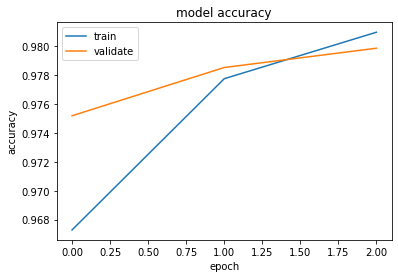

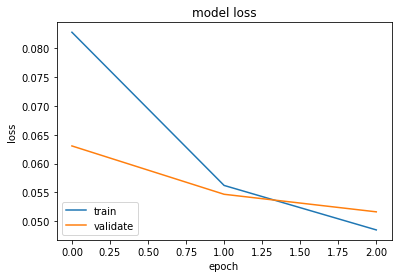

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='lower left')
plt.show()

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 54us/step


In [16]:
test_acc

0.9794400023460388

In [17]:
import matplotlib.pyplot as plt
print (history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [18]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[3.34523349e-07, 9.34952951e-08, 1.02483855e-05, 9.22554761e-08,
        1.59721731e-06, 7.19838194e-04, 2.07602352e-05, 4.90812166e-03,
        1.65852216e-05, 9.94322300e-01],
       [7.94202497e-05, 6.57531587e-07, 9.96792853e-01, 1.75769783e-05,
        2.70987255e-03, 2.92093182e-06, 3.94191244e-04, 3.62816732e-09,
        1.53308611e-06, 9.28295435e-07],
       [5.54416283e-06, 9.99764621e-01, 6.02156149e-07, 4.68224171e-05,
        1.79696755e-04, 2.93486355e-08, 1.97080089e-06, 6.36536657e-10,
        6.00993872e-07, 4.89575136e-09],
       [1.31949473e-05, 9.99668360e-01, 4.34852893e-07, 1.80668489e-04,
        1.30043671e-04, 8.72840005e-08, 6.72424540e-06, 1.88813125e-08,
        2.83941915e-07, 2.89026953e-08]], dtype=float32)

In [19]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

[Source for the experiment](https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5)
[Optimizer](https://emiliendupont.github.io/2018/01/24/optimization-visualization/)
